In [1]:
from utils.result import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.io import loadmat
from utils.get_data import *
from utils.other_methods import *
import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as mpatches
import glob
import itertools


#import kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


warnings.filterwarnings("ignore")

%reload_ext autoreload
%autoreload 2
# stimuli = ['0-BEA', '0-BOL', '0-Ctl', '1-DatExt', '0-FAR', '0-GER', '0-ISO', '0-LIN', 
#            '0-M2', '0-M3', '0-M4', '0-M5', '0-M6', '0-MAL', '0-MYR', '0-NER', 
#            '1-P3', '1-P4', '1-P5', '1-P9', '1-P9_Hund', '1-P9_Ten', '1-P9_TenThous']

# stimuli = ['0-BEA', '0-BOL', '0-Ctl', '0-FAR', '0-GER', '0-ISO', 
#            '0-LIN', '0-M2', '0-M3', '0-M4', '0-M5', '0-M6', 
#            '0-MAL', '0-MYR', '0-NER', 
#            '1-P9_TenThous', '1-DatExt', '1-P3', '1-P4', '1-P5', '1-P9', '1-P9_Hund', '1-P9_Ten']

stimuli = ['BEA', 'BOL', 'CTL', 'FAR', 'GER', 'ISO', 'LIN', 'M2', 'M3', 'M4', 
           'M5', 'M6', 'MAL', 'MYR', 'NER', 'DATEXT', 'P3', 'P4', 'P5', 'P9', 
           'P9_HUND', 'P9_TEN', 'P9_TENTHOUS']

# stimuli = ['0-BEA', '0-BOL', '0-CTL', '0-FAR', '0-GER', '0-ISO', '0-LIN', '0-M2', '0-M3', '0-M4', 
#            '0-M5', '0-M6', '0-MAL', '0-Myr', '0-NER', '1-DATEXT', '1-P3', '1-P4', '1-P5', '1-P9', 
#            '1-P9_HUND', '1-P9_TEN', '1-P9_TENTHOUS']

mixture_dict = {"1-P9":["0-BEA","0-BOL","0-MAL","0-MYR","0-LIN","0-NER","0-GER","0-ISO","0-FAR"],
                "1-P5":["0-BEA","0-BOL","0-LIN","0-NER","0-GER"],
                "1-P4":["0-BEA","0-BOL","0-LIN","0-NER"],
                "1-P3":["0-BEA","0-BOL","0-LIN"],
                "0-M6":["0-MAL","0-MYR","0-NER","0-GER","0-ISO","0-FAR"],
                "0-M5":["0-MAL","0-MYR","0-GER","0-ISO","0-FAR"],
                "0-M4":["0-MAL","0-MYR","0-ISO","0-FAR"],
                "0-M3":["0-MAL","0-ISO","0-FAR"],
                "0-M2":["0-BEA","0-BOL"]}

time_resolution=3
components =["0-BEA","0-BOL","0-MAL","0-MYR","0-LIN","0-NER","0-GER","0-ISO","0-FAR", "0-DATEXT", "0-CTL"]



# palette = {"1-DATEXT":"013220", "0-CTL":"CA1F7B", "1-P9":"8DB600", \
# "1-P5":"7BA05B", "1-P4":"568203", "1-P3":"004225", "0-M6":"FF1DCE", \
# "0-M5":"CA1F7B", "0-M4":"FF0090", "0-M3":"F653A6", "0-M2":"D0417E",\
# "0-Bol":"9F4576", "0-Bea":"E30B5C", "0-Far":"FF33CC", "0-Ger":"FF66CC",\
# "0-Ner":"FC0FC0", "0-Lin":"FF6FFF", "0-Mal":"CF71AF", "0-Myr":"CF3476",\
# "0-Iso": "DE5D83","1-P9_Hund":"1E4D2B", "1-P9_TenThous":"00563B", "1-P9_Ten":"03C03C"}

palette = {"DATEXT":"013220", "CTL":"CA1F7B", "P9":"8DB600", \
"P5":"7BA05B", "P4":"568203", "P3":"004225", "M6":"FF1DCE", \
"M5":"CA1F7B", "M4":"FF0090", "M3":"F653A6", "M2":"D0417E",\
"BOL":"9F4576", "BEA":"E30B5C", "FAR":"FF33CC", "GER":"FF66CC",\
"NER":"FC0FC0", "LIN":"FF6FFF", "MAL":"CF71AF", "MYR":"CF3476",\
"ISO": "DE5D83","P9_HUND":"1E4D2B", "P9_TENTHOUS":"00563B", "P9_TEN":"03C03C"}



/hpc/home/pc266/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Three Scatter Subplots in one plot

In [4]:
##########spatial attention##########


dur_spa_attcond_stim_ensemble_average = []

for target in range(14):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True,shuffle = False,\
                                                                                panyu = "/hpc/home/pc266/data/ALdata/070921_cleaned.csv",\
                                                                                    prefix = "/hpc/home/pc266/AL_generative")
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)


mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)

perplex = 7
early_exagg = 1

mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=perplex,early_exaggeration=early_exagg)
a_0 = tsne.fit_transform(mean_stim_beta)



a_0 = np.array([[ 146.82721,  299.75272],
 [-188.1174,  -317.201  ],
 [ 205.59822,  450.7473 ],
 [ -79.2776,  -383.76877],
 [  13.27165,  113.61497],
 [ 215.91959,  350.66873],
 [  99.17219,  344.50308],
 [  78.11698,  251.80482],
 [-132.18456, -254.20705],
 [ 109.41329,  483.92172],
 [ -48.53172,   34.33066],
 [  28.7447,    17.21015],
 [  25.01241,  -41.13112],
 [  65.76951,  182.88432],
 [ 151.23407,  399.07013],
 [ 142.54466,  226.928  ],
 [   2.23618, -263.5337 ],
 [-202.05798, -254.11829],
 [-108.6691,  -319.72388],
 [  10.56496, -207.55826],
 [-110.68194, -180.02368],
 [-222.03613, -167.63382],
 [-173.2046,  -128.9619 ]])

# messed_stimuli = ['0-Bea', '0-Bol', '0-Ctl', '1-DatExt', '0-Far', '0-Ger', '0-Iso', '0-Lin', 
#                  '0-M2', '0-M3', '0-M4', '0-M5', '0-M6', '0-Mal', '0-Myr', '0-Ner', 
#                  '1-P3', '1-P4', '1-P5', '1-P9', '1-P9_Hund', '1-P9_Ten', '1-P9_TenThous']
messed_stimuli = ['BEA', 'BOL', 'CTL', 'DATEXT', 'FAR', 'GER', 'ISO', 'LIN', 
                 'M2', 'M3', 'M4', 'M5', 'M6', 'MAL', 'MYR', 'NER', 
                 'P3', 'P4', 'P5', 'P9', 'P9_HUND', 'P9_TEN', 'P9_TENTHOUS']

#sort messed_stimuli and obtain sorting index
sorting_index = [messed_stimuli.index(stimuli[i]) for i in range(len(stimuli))]

a_0 = a_0[sorting_index]


########binless##########

csv = "/hpc/home/pc266/data/ALdata/070921_cleaned.csv"
subject = csv.split("/")[-1][0:-12]
time_resolution=3
df, neurons = read_moth(csv, time_resolution)
neurons_csv = [csv + n for n in neurons]
name_mapper = {neurons[i]: neurons_csv[i] for i in range(len(neurons))}
df = df.rename(columns=name_mapper)
df[["label", "stimuli"]].drop_duplicates()
df["label_stim"] = df["label"].astype(str) + "-" + df["stimuli"].str.upper()
all_stimuli_count = df.value_counts("label_stim").to_dict()
all_stimuli_count = dict(sorted(all_stimuli_count.items()))
num_stimuli =  len(all_stimuli_count)

tau = 0.005

all_tau_list = []
sim_result = {}
dur_stim = []
all_stim_sync_index = []
triu_index = np.triu_indices(len(neurons_csv),1)
for s_index, s in enumerate(all_stimuli_count):
    # One hot encoding with components
    sim_result[s] = []
    for run in range(all_stimuli_count[s]):
        data_concat_has_spike, neurons_has_spike = make_spiketrain(df, 
                                                                s,
                                                                run,
                                                                neurons_csv, 
                                                                time_resolution, 
                                                                0,
                                                                False)
        
        data_concat_smooth = exponential_smoothing_spike(data_concat_has_spike,time_resolution,tau=tau)
        sim_mat = similarity_measure(data_concat_smooth[400:800])
        sim_mat_shuffle = []
        for run_shuffle in range(all_stimuli_count[s]):
            if run == run_shuffle: continue
            data_shuffle, neurons_has_spike = make_spiketrain(df, 
                                                            s,
                                                            run_shuffle,
                                                            neurons_csv, 
                                                            time_resolution, 
                                                            0,
                                                            False)
            data_shuffle_smooth = exponential_smoothing_spike(data_shuffle,time_resolution,tau=tau)
            sim_mat_shuffle.append(similarity_measure_shuffle(data_concat_smooth[400:800], 
                                                            data_shuffle_smooth[400:800]))
        mean_shuffle = np.mean(sim_mat_shuffle,0)
        after_shuffle = sim_mat - mean_shuffle
        sim_result[s].append(after_shuffle)
    all_stim_sync_index.append(np.mean(sim_result[s],0)[triu_index].flatten())
all_tau_list.append((sim_result,all_stim_sync_index))


all_stim_sync_index = np.array(all_tau_list[0][1])
tsne = TSNE(n_components=2, perplexity=5)
a_1 = tsne.fit_transform(all_stim_sync_index)




#########sync index#########
sync_index = loadmat("sync_index_070921.mat")

numseq = 5
binsize = 5

# sync_index_values = sync_index["stack_{}_{}".format(ns, bs)]
sync_index_values = sync_index["sync_index_070921_{}_{}".format(numseq, binsize)]
sync_index_values[np.where(np.isinf(sync_index_values))] = 0 
tsne = TSNE(n_components=2, perplexity=5)
a_2 = tsne.fit_transform(sync_index_values)










Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8e23f191f0>
Traceback (most recent call last):
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_w

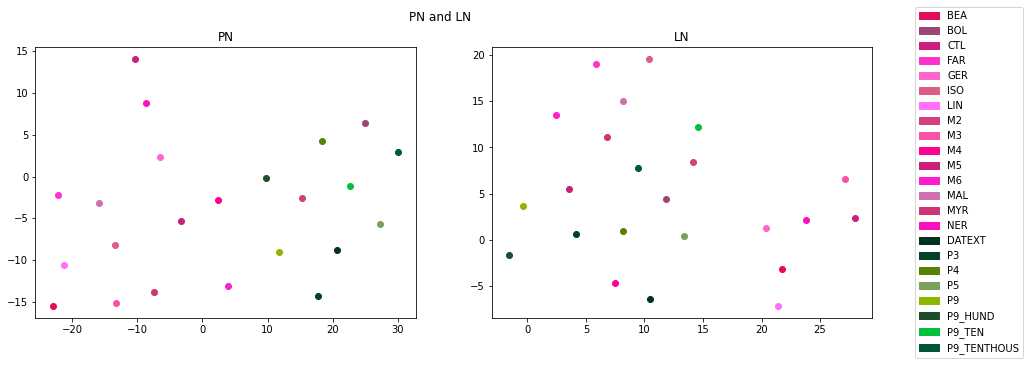

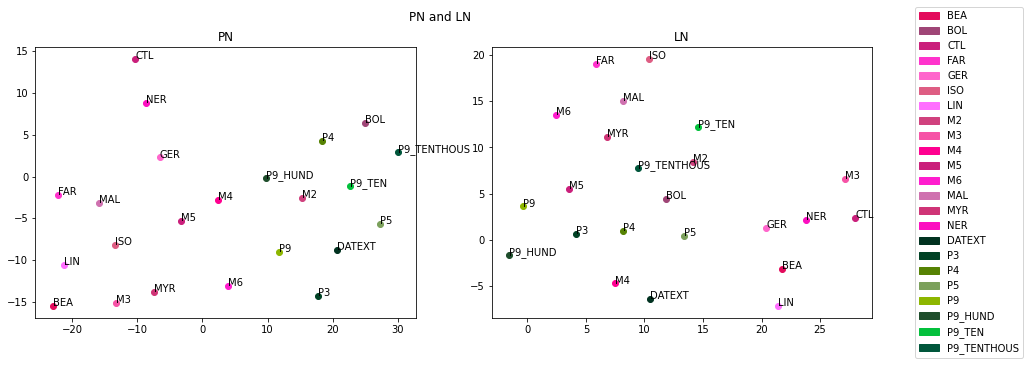

In [10]:
#LN and PN
a_pn = np.array([[-23.00099,    -15.493326  ],
 [ 25.01178 ,     6.3909802 ],
 [-10.303558 ,   14.092613  ],
 [-22.228548 ,   -2.222985  ],
 [ -6.566362 ,    2.2925322 ],
 [-13.358059 ,   -8.160332  ],
 [-21.22534  ,  -10.565088  ],
 [ 15.3155775,   -2.5940964 ],
 [-13.242798 ,  -15.100629  ],
 [  2.4128013,   -2.836759  ],
 [ -3.3057735,   -5.3414316 ],
 [  3.9954522 , -13.071193  ],
 [-15.832632 ,   -3.1655235 ],
 [ -7.371346 ,  -13.804401  ],
 [ -8.597811 ,    8.788438  ],
 [ 20.619463 ,   -8.7513    ],
 [ 17.793118 ,  -14.285905  ],
 [ 18.327875 ,    4.2272882 ],
 [ 27.182354 ,   -5.674225  ],
 [ 11.781037 ,   -9.000264  ],
 [  9.708396 ,   -0.21522593],
 [ 22.57691  ,   -1.1010709 ],
 [ 30.094025 ,    2.9887269 ]])

a_ln = np.array([[21.722185,   -3.1399338 ],
 [11.809056,    4.4463425 ],
 [27.982153,    2.3902833 ],
 [ 5.83173 ,   19.04468   ],
 [20.417566,    1.3261154 ],
 [10.395708,   19.566992  ],
 [21.403547,   -7.123614  ],
 [14.144588,    8.451414  ],
 [27.164524,    6.6059203 ],
 [ 7.469973,   -4.691196  ],
 [ 3.5760067,   5.5370708 ],
 [ 2.406166 ,  13.524793  ],
 [ 8.1476145,  15.004409  ],
 [ 6.7809315,  11.1274605 ],
 [23.765049 ,   2.172955  ],
 [10.503226 ,  -6.3561735 ],
 [ 4.158237 ,   0.68851304],
 [ 8.150167 ,   0.94778913],
 [13.36952  ,   0.44963527],
 [-0.41468936,  3.635399  ],
 [-1.5581161 , -1.6292199 ],
 [14.56906   , 12.258499  ],
 [ 9.403197  ,  7.7622733 ]])

def plt_scattered_ln_pn(annotation):
    fig,axs = plt.subplots(1,2, figsize=(15,5))

    for i in range(0, len(a_pn)):
        axs[0].scatter(a_pn[i,0], a_pn[i,1], c=f"#{palette[stimuli[i]]}")
        if annotation:
            axs[0].annotate(stimuli[i], (a_pn[i,0], a_pn[i,1]))

    for i in range(0, len(a_ln)):
        axs[1].scatter(a_ln[i,0], a_ln[i,1], c=f"#{palette[stimuli[i]]}")
        if annotation:
            axs[1].annotate(stimuli[i], (a_ln[i,0], a_ln[i,1]))

    axs[0].set_title("PN")
    axs[1].set_title("LN")


    #set color bar according to palette
    handles = [mpatches.Patch(color=f"#{palette[stimuli[i]]}", label=stimuli[i]) for i in range(0, len(stimuli))]

    #set location of color bar at outside the image box, right next to the image, make it the same height as the image
    plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.1, 0.5))

    #supertitle
    plt.suptitle("PN and LN")

    plt.show()

    #savefig
    fig.savefig("PN_LN_Scattered_Plot.pdf")
    fig.savefig("PN_LN_Scattered_Plot.svg")

plt_scattered_ln_pn(False)
plt_scattered_ln_pn(True)


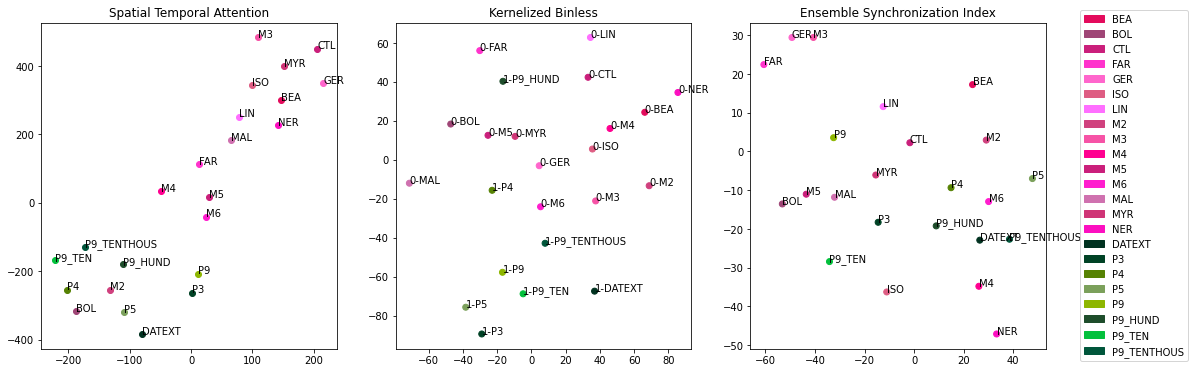

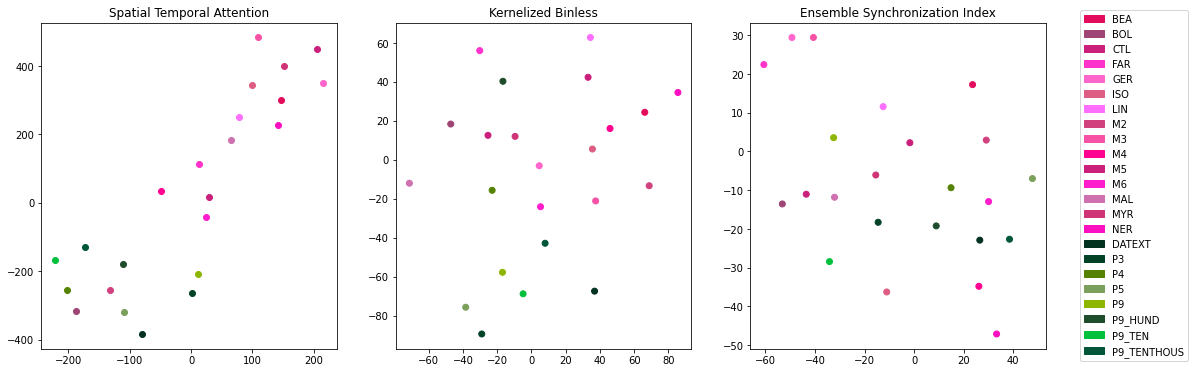

In [5]:

def three_scatter_plots(a_0,a_1,a_2,annotation = False):
    #Plot
    fig, axes = plt.subplots(figsize=(18,6), ncols=3)


    #spatt
    for i in range(0, len(a_0)):
        axes[0].scatter(a_0[i,0], a_0[i,1], c=f"#{palette[stimuli[i]]}")
        if annotation:
            axes[0].annotate(stimuli[i], (a_0[i,0], a_0[i,1]))


    axes[0].set_title("Spatial Temporal Attention")


    #binless

    axes[1].scatter(a_1[:,0], a_1[:,1], c = [f"#{palette[stimuli[i]]}" for i in range(0, len(stimuli))])

    if annotation:
        for j in range(0, len(a_1)):
            axes[1].annotate(list(sim_result.keys())[j], (a_1[j,0], a_1[j,1]))
    # 

    axes[1].set_title("Kernelized Binless")

    #sync_index
    axes[2].scatter(a_2[:,0], a_2[:,1], c = [f"#{palette[stimuli[i]]}" for i in range(0, len(stimuli))])
    
    if annotation:
        for i in range(0, len(a_2)):
            axes[2].annotate(stimuli[i], (a_2[i,0], a_2[i,1]))
        
    axes[2].set_title("Ensemble Synchronization Index")


    #set color bar according to palette
    handles = [mpatches.Patch(color=f"#{palette[stimuli[i]]}", label=stimuli[i]) for i in range(0, len(stimuli))]

    #set location of color bar at outside the image box, right next to the image, make it the same height as the image
    plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.1, 0.5))

    # fig.suptitle("Three Scattered Plots")
    if annotation:
        plt.savefig(f"Three_Scattered_Plots_annotated.pdf", bbox_inches="tight")

        #generate also an svg file
        plt.savefig(f"Three_Scattered_Plots_annotated.svg", bbox_inches="tight")

    else:
        plt.savefig(f"Three_Scattered_Plots.pdf", bbox_inches="tight")

        #generate also an svg file
        plt.savefig(f"Three_Scattered_Plots.svg", bbox_inches="tight")

three_scatter_plots(a_0,a_1,a_2,True)
three_scatter_plots(a_0,a_1,a_2)

Kmeans Clustering Accuracies

In [35]:


count = 0
for seed in range(100):
    print(count)

    dur_spa_attcond_stim_ensemble_average = []

    for target in range(14):
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                                cond=True,shuffle = False,\
                                                                                    panyu = "/hpc/home/pc266/data/ALdata/070921_cleaned.csv",\
                                                                                        prefix = "/hpc/group/tarokhlab/pc266", seed = seed, n_runs = 1)
        dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)


    mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)

    perplex = 7
    early_exagg = 1

    mean_stim_beta_dict = {}
    tsne = TSNE(n_components=2, perplexity=perplex,early_exaggeration=early_exagg)
    a_0 = tsne.fit_transform(mean_stim_beta)

    count += 1

    


0
run: 0; n_runs: 1
savepath: /hpc/group/tarokhlab/pc266/result/seed_0_070921_cleaned/sparse-attflow/sparse-attflow-S1U1-cond_stim/run_0


run: 0; n_runs: 1
savepath: /hpc/group/tarokhlab/pc266/result/seed_0_070921_cleaned/sparse-attflow/sparse-attflow-S1U2-cond_stim/run_0


FileNotFoundError: [Errno 2] No such file or directory: '/hpc/group/tarokhlab/pc266/result/seed_0_070921_cleaned/sparse-attflow/sparse-attflow-S1U2-cond_stim/run_0/test_stats.pkl'

In [28]:
y = list(map(lambda x: int(x.split("-")[0]), stimuli))

#perform kmeans clustering on a_0
kmeans = KMeans(n_clusters=2, random_state=42).fit(a_0)
accu = accuracy_score(y, kmeans.labels_)
print(accu)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f83ca936040>
Traceback (most recent call last):
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_w

0.782608695652174


121114
130416


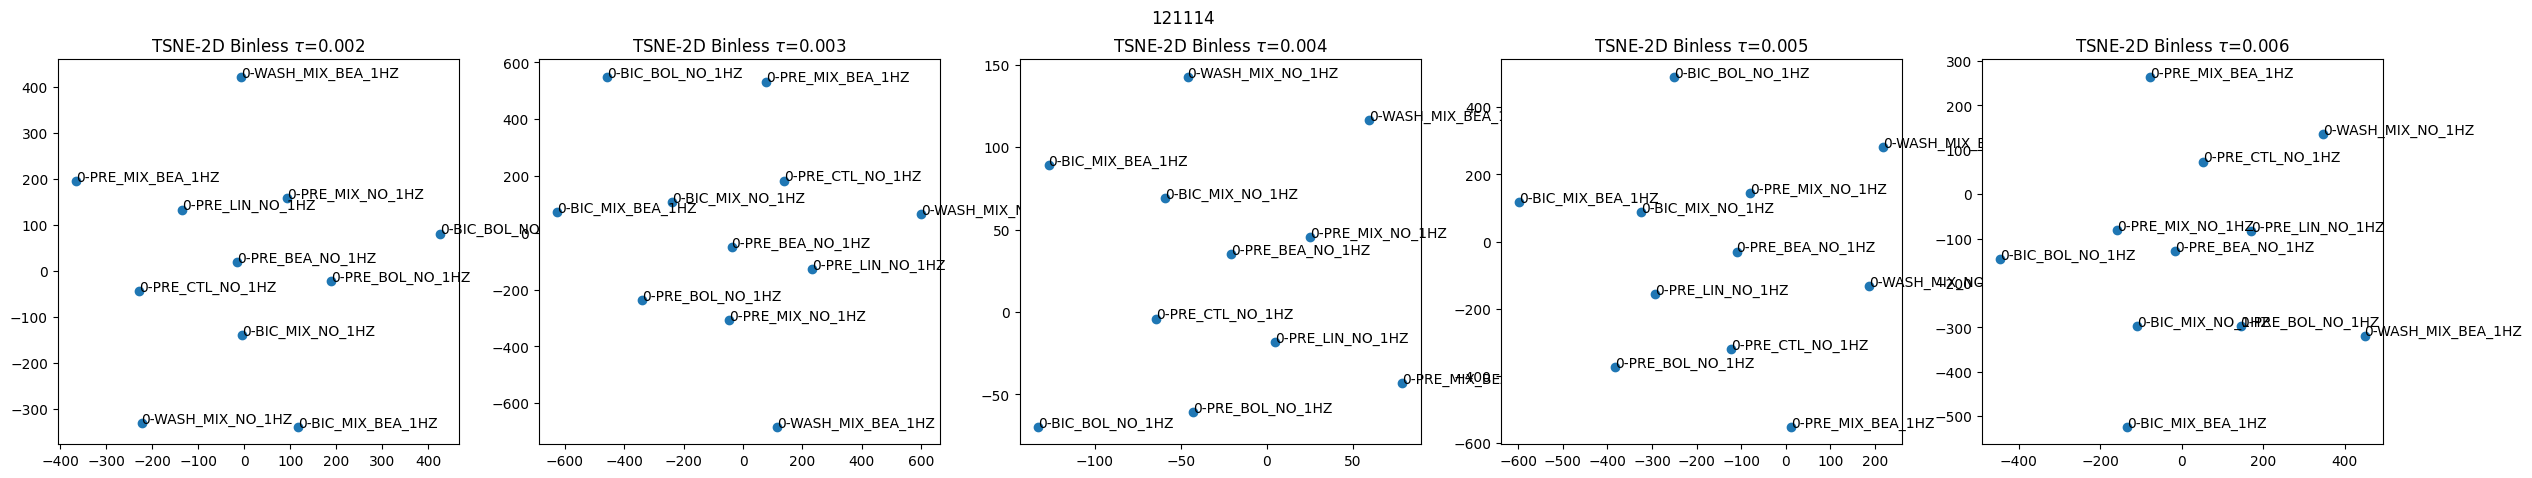

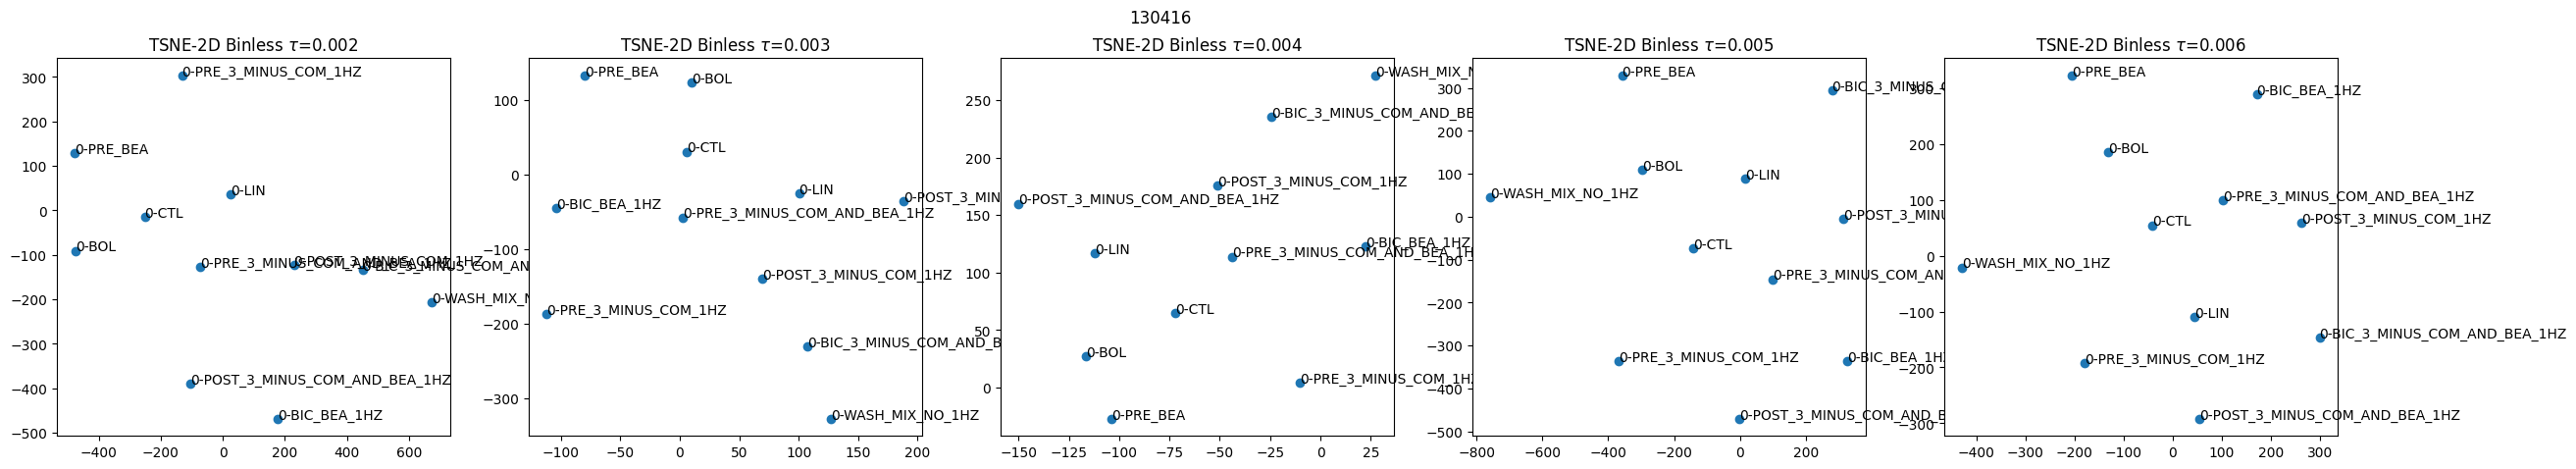

In [4]:
import glob
df_all = None
neurons_all = None
for csv in glob.glob("/hpc/group/tarokhlab/hy190/data/AL/ALdata_new/*"):
    if ".csv" in csv and "timestamp" not in csv and "pre_stim" not in csv:
        subject = csv.split("/")[-1][0:-12]
        print(subject)
        path=csv
        time_resolution=3
        df, neurons = read_moth(path, time_resolution)
        neurons_csv = [csv + n for n in neurons]
        name_mapper = {neurons[i]: neurons_csv[i] for i in range(len(neurons))}
        df = df.rename(columns=name_mapper)
        df[["label", "stimuli"]].drop_duplicates()
        df["label_stim"] = df["label"].astype(str) + "-" + df["stimuli"].str.upper()
        all_stimuli_count = df.value_counts("label_stim").to_dict()
        all_stimuli_count = dict(sorted(all_stimuli_count.items()))
        num_stimuli =  len(all_stimuli_count)
        
        taus = np.array(list(range(2,7)))/1000
        all_tau_list = []
        for tau in taus:
            sim_result = {}
            dur_stim = []
            all_stim_sync_index = []
            triu_index = np.triu_indices(len(neurons_csv),1)
            for s_index, s in enumerate(all_stimuli_count):
                # One hot encoding with components
                sim_result[s] = []
                for run in range(all_stimuli_count[s]):
                    data_concat_has_spike, neurons_has_spike = make_spiketrain(df, 
                                                                            s,
                                                                            run,
                                                                            neurons_csv, 
                                                                            time_resolution, 
                                                                            0,
                                                                            False)
                    
                    data_concat_smooth = exponential_smoothing_spike(data_concat_has_spike,time_resolution,tau=tau)
                    sim_mat = similarity_measure(data_concat_smooth[400:800])
                    sim_mat_shuffle = []
                    for run_shuffle in range(all_stimuli_count[s]):
                        if run == run_shuffle: continue
                        data_shuffle, neurons_has_spike = make_spiketrain(df, 
                                                                        s,
                                                                        run_shuffle,
                                                                        neurons_csv, 
                                                                        time_resolution, 
                                                                        0,
                                                                        False)
                        data_shuffle_smooth = exponential_smoothing_spike(data_shuffle,time_resolution,tau=tau)
                        sim_mat_shuffle.append(similarity_measure_shuffle(data_concat_smooth[400:800], 
                                                                        data_shuffle_smooth[400:800]))
                    mean_shuffle = np.mean(sim_mat_shuffle,0)
                    after_shuffle = sim_mat - mean_shuffle
                    sim_result[s].append(after_shuffle)
                all_stim_sync_index.append(np.mean(sim_result[s],0)[triu_index].flatten())
            all_tau_list.append((sim_result,all_stim_sync_index))
        fig, axes = plt.subplots(figsize=(6*len(taus),5), ncols=len(taus))
        count = 0
        for i, tau in enumerate(taus):
            all_stim_sync_index = np.array(all_tau_list[i][1])
            tsne = TSNE(n_components=2, perplexity=5)
            a = tsne.fit_transform(all_stim_sync_index)
            axes[count].scatter(a[:,0], a[:,1])
            for j in range(0, len(a)):
                axes[count].annotate(list(sim_result.keys())[j], (a[j,0], a[j,1]))
            axes[count].set_title("TSNE-2D Binless " + r'$\tau$={}'.format(tau))
            count += 1
        fig.suptitle(subject)
        fig.savefig("plot/2dTSNE_binless_{}.pdf".format(subject), bbox_inches="tight")

In [6]:
df, neurons = read_moth('/hpc/group/tarokhlab/hy190/data/AL/ALdata/070906_pre_stim_cleaned.csv', 
                        time_resolution)
df[["label", "stimuli"]].drop_duplicates()
df["label_stim"] = df["label"].astype(str) + "-" + df["stimuli"].str.upper()
stim_name = df["label_stim"].unique()

In [4]:
from utils.get_data import make_spiketrain

In [8]:
stim_name

array(['0-BEA', '0-BOL', '0-MAL', '0-MYR', '0-LIN', '0-NER', '0-GER',
       '0-ISO', '0-FAR', '1-DATEXT', '1-P9', '1-P9_TEN', '1-P9_HUND',
       '1-P9_TENTHOUS', '0-CTL', '1-P5', '1-P4', '1-P3', '0-M6', '0-M5',
       '0-M4', '0-M3', '0-M2'], dtype=object)

In [9]:
data_concat, neurons = make_spiketrain(df, '0-BEA', 0, neurons, time_resolution, tot_time=2)
fig, ax = plt.subplots(figsize=(10,1*len(neurons)), nrows=len(neurons))
for i, neuron in enumerate(neurons):
    if data_concat[:,i].sum() != 0:
        ax[i].plot(data_concat[:,i])
        ax[i].set_title(neuron.item(), loc="left")
plt.tight_layout()

IndexError: index 1338 is out of bounds for axis 0 with size 1200